# **EXPLICAÇÃO**

**MODELOS SUPERVISONADOS**

APRESENTAMOS OS DADOS (ENTRADA) E RESULTADO (SAIDA)

MODELO DE REGRESSÃO - UTILIZADO PARA PREVER UM NÚMERO

MODELO DE CLASSIFICAÇÃO - UTILIZADO PARA CLASSIFICAR IMAGENS

---
**MODELOS NÃO SUPERVISIONADOS**

ONDE APRESENTAMOS OS DADOS (ENTRADA) E PEDIMOS O RESULTADO (SAIDA) A MAQUINA VAI APRENDER DE ACORDO COM OS DADOS E VAI DAR O RESULTADO

DEEP LEARNING É UM SUB CONJUNTO DO DEEP LEARNING

SÃO MODELOS MAIS ESPECIFICOS UTILIZAM O CONCEITO DE REDE NEURAL NÃO APRESENTA ENTRADA E SAIDA, SO APRESENTA AS ENTRADAS E PEDE A SAIDA

---
**BASE DE TREINO & BASE DE TESTE**

BASE DE TREINO - BASE MAIS PESADA, ONDE E UTILIZADA PARA TREINAR A MAQUINA (GERALEMNTE 70% DA BASE DE DADOS)

BASE DE TESTE - BASE MAIS LEVE, UTILIZADA PARA VALIDAR SE O APRENDIZADO FOI UM SUCESSO (GERALMENTE 30% DA BASE DE DADOS)

# **Código Modelo Supervisionado | PIB**

PREVER QUANTO VAI SER O PIB CONSIDERANDO O TRAFEGO DE VEICULOS LEVES E PESADOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('pib.csv')
df.head()

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93


In [ ]:
#FATIAMENTO SEPARANDO AS COLUNAS NECESSÁRIAS PARA A ANÁLISE
grafico = df.iloc[:,2:6]
grafico

,PIB,BRL,BRP,BRT
0,103.09,109.19,108.67,109.08
1,102.05,95.65,104.52,97.63
2,110.43,91.69,125.53,99.26
3,106.77,95.36,118.34,100.49
4,108.08,92.47,121.49,98.96
...,...,...,...,...
133,144.42,147.35,133.73,143.57
134,151.68,149.64,163.27,152.09
135,147.03,153.81,149.93,152.28
136,148.94,149.66,153.03,149.82


<Axes: >

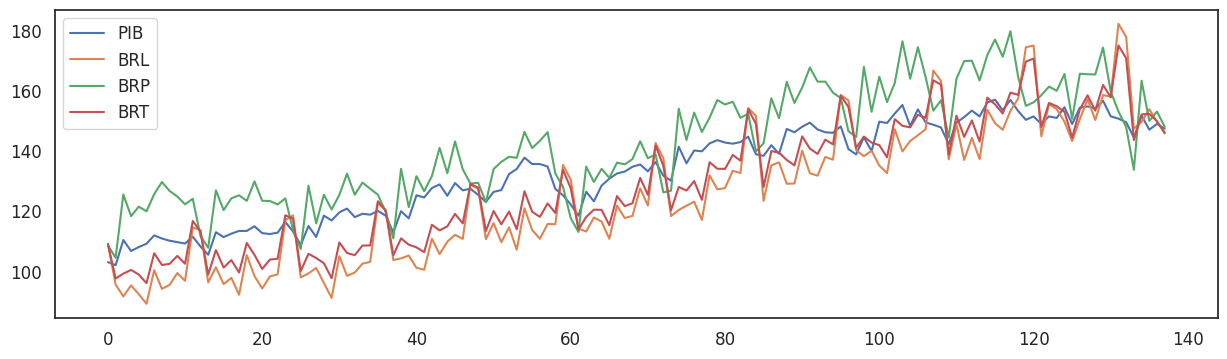

In [ ]:
#CRIAÇÃO DE PARAMETROS PARA VÁRIOS GRÁFICOS
#IDENTIFICANDO SE AS VARIÁVEIS TEM COMPORTAMENTOS IGUAIS / PARECIDOS
plt.rcParams['figure.figsize'] = (15,4)
fig, ax = plt.subplots()

grafico.plot(ax = ax)

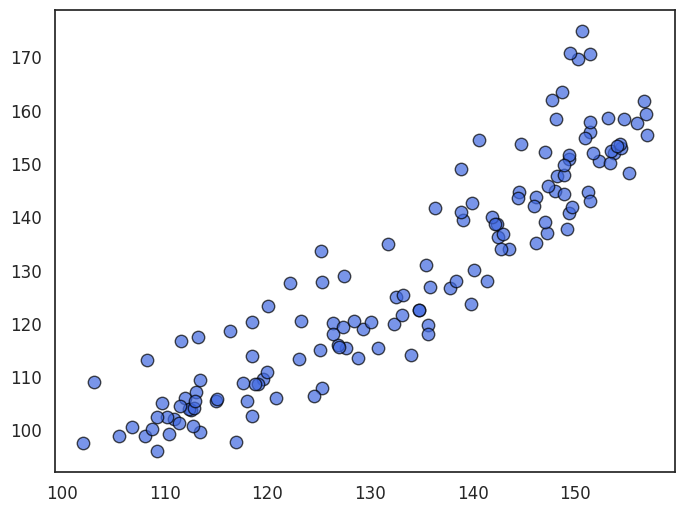

In [ ]:
#PLOTANDO A RELAÇÃO ENTRE AS VARIAVEIS
plt.figure(figsize = (8,6))
plt.scatter(grafico['PIB'], grafico['BRT'], color = 'royalblue', s = 80, alpha = 0.7, edgecolors = 'black')

In [ ]:
correlacao = df.iloc[:,2:15]
correlacao.head()

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT
0,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,117.49,115.15,98.66,112.59
1,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,97.55,102.40,90.20,100.51
2,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,96.27,105.88,107.36,106.11
3,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,117.25,100.96,105.64,99.25,104.65
4,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,117.08,97.02,106.74,102.29,106.05


In [ ]:
#VERIFICANDO SE HÁ COLUNAS NÃO NUMÉRICAS
correlacao.dtypes

,0
PIB,float64
BRL,float64
BRP,float64
BRT,float64
SLP,float64
SPP,float64
SPT,float64
PRL,float64
PRP,float64
PRT,float64


In [ ]:
#SE HOUVESSE COLUNAS / LINHAS NÃO NUMÉRICAS, UTILIZARIA O MÉTODO ABAIXO:
dfnum = correlacao.select_dtypes(include = 'number')
dfnum

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT
0,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,117.49,115.15,98.66,112.59
1,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,97.55,102.40,90.20,100.51
2,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,96.27,105.88,107.36,106.11
3,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,117.25,100.96,105.64,99.25,104.65
4,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,117.08,97.02,106.74,102.29,106.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,115.10,141.47,132.48,115.71,129.70
134,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,153.95,149.51,141.81,135.50,140.47
135,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,136.55,152.55,138.93,122.07,135.90
136,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,141.91,146.34,141.03,125.93,138.27


In [ ]:
#CÁLCULO DE CORRELAÇÃO
calccorr = dfnum.corr()

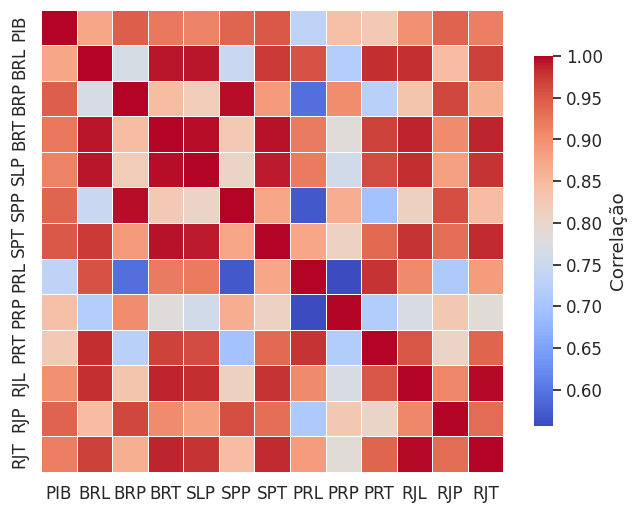

In [ ]:
#GRÁFFICO DE CORRELAÇÃO
plt.figure(figsize = (8,6))
sns.set(style = 'white', font_scale = 1.1,)
sns.heatmap(
    calccorr,
    cmap = 'coolwarm',
    square = True,
    cbar_kws = {'shrink':0.8, 'label':'Correlação'},
    linewidths = 0.5)
plt.show()

In [ ]:
#SEPARAÇÃO DE TREINO E TESTE
                                                    #ALIMENTA O xtreino & xteste
#X= ENTRADA      Y= SAIDA                                                    #ALIMENTA O yteste & ytreino
xtreino, xteste, ytreino, yteste = train_test_split(df[['BRP','SPP','SPT']], df['PIB'], test_size = 0.32, random_state = 33)

In [ ]:
#CONSTRUÇÃO DO MODELO
modelo = LinearRegression()
modelo.fit(xtreino, ytreino)

LinearRegression()

In [ ]:
#VALIDAÇÃO DO MODELO
import statsmodels.api as sm      #FIT É UTILIZADO PARA TREINAR A MACHINE
modelo = sm.OLS(ytreino, xtreino).fit()
            #OLS = CONTEMPLA VÁRIAS MÉTRICAS ESTATISTICAS
print(modelo.summary())

#DENTRO DO MODELO DE REGRESSÃO, SABEMOS SE ELE É UM BOM MODELO OLHANDO PARA O 'R-SQUARED'
#'R-SQUARED' NESSE CASO APRESENTOU 0.999 (99,9% DE ACERTO)

#P>|t| = 'P VALOR' INTERVALO DE CONFIANÇA, QUANTO MENOR, MELHOR.
#std err = 'ERRO' DESVIO PADRÃO, QUANTO MENOR, MELHOR.

#**R-SQUARED E std err ALTO = OVERTFIT (QUANDO O MODELO SE AJUSTA AO TREINAMENTO E NÃO APRENDE PADRÕES)**

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.675e+04
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                   1.27e-132
Time:                        19:21:31   Log-Likelihood:                         -270.36
No. Observations:                  93   AIC:                                      546.7
Df Residuals:                      90   BIC:                                      554.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------